# Attic treasures: Creating a model 

## import modules 

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from joblib import dump, load

## load the pickle:

In [2]:
greatest_df = pd.read_pickle("Data/greatest_df_2.pkl")

In [3]:
greatest_df.head()

,song titles,artists,songs uri,song id,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,D.A.N.C.E,Justice,spotify:track:33yAEqzKXexYM3WlOYtTfQ,33yAEqzKXexYM3WlOYtTfQ,0.613,0.962,6,-5.070,0,0.2780,...,0.8240,0.496,113.015,audio_features,33yAEqzKXexYM3WlOYtTfQ,spotify:track:33yAEqzKXexYM3WlOYtTfQ,https://api.spotify.com/v1/tracks/33yAEqzKXexY...,https://api.spotify.com/v1/audio-analysis/33yA...,242267,4
1,"White & Nerdy (Parody of ""Ridin'"" by Chamillio...","""Weird Al"" Yankovic",spotify:track:60R2v9lheAu3lwZwAFxMZK,60R2v9lheAu3lwZwAFxMZK,0.791,0.613,1,-11.628,0,0.0763,...,0.0765,0.896,143.017,audio_features,60R2v9lheAu3lwZwAFxMZK,spotify:track:60R2v9lheAu3lwZwAFxMZK,https://api.spotify.com/v1/tracks/60R2v9lheAu3...,https://api.spotify.com/v1/audio-analysis/60R2...,170640,4
2,Goliath,Smith & Thell,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,0z4kyKuFGmUV7WQ7gB1sAp,0.528,0.833,9,-6.190,1,0.0514,...,0.0680,0.460,127.998,audio_features,0z4kyKuFGmUV7WQ7gB1sAp,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,https://api.spotify.com/v1/tracks/0z4kyKuFGmUV...,https://api.spotify.com/v1/audio-analysis/0z4k...,204759,4
3,L'Empordà,Sopa De Cabra,spotify:track:1vzugDTXDgZCF0QQrzB5hX,1vzugDTXDgZCF0QQrzB5hX,0.681,0.837,4,-8.907,1,0.0410,...,0.0986,0.959,143.472,audio_features,1vzugDTXDgZCF0QQrzB5hX,spotify:track:1vzugDTXDgZCF0QQrzB5hX,https://api.spotify.com/v1/tracks/1vzugDTXDgZC...,https://api.spotify.com/v1/audio-analysis/1vzu...,159333,4
4,House of the Rising Sun,The Animals,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,4mn2kNTqiGLwaUR8JdhJ1l,0.316,0.484,9,-9.110,0,0.0308,...,0.0912,0.299,117.363,audio_features,4mn2kNTqiGLwaUR8JdhJ1l,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,https://api.spotify.com/v1/tracks/4mn2kNTqiGLw...,https://api.spotify.com/v1/audio-analysis/4mn2...,269907,3


In [4]:
# drop anything is not features. I don't want to cluster by identifier similarity...

In [5]:
greatest_clustering_df=greatest_df.drop(columns=["song titles", 
                "artists", 
                "songs uri", 
                "song id",
                "type",
                "id",
                "uri",
                "track_href",                
                "analysis_url",
                "duration_ms",
                "time_signature"])

In [6]:
greatest_clustering_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.613,0.962,6,-5.070,0,0.2780,0.034000,0.000000,0.8240,0.496,113.015
1,0.791,0.613,1,-11.628,0,0.0763,0.098600,0.000000,0.0765,0.896,143.017
2,0.528,0.833,9,-6.190,1,0.0514,0.000414,0.000001,0.0680,0.460,127.998
3,0.681,0.837,4,-8.907,1,0.0410,0.036200,0.000002,0.0986,0.959,143.472
4,0.316,0.484,9,-9.110,0,0.0308,0.000334,0.004450,0.0912,0.299,117.363


In [7]:
greatest_clustering_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000
mean,0.519218,0.520762,5.185374,-10.757332,0.647717,0.066962,0.427019,0.201792,0.182572,0.440061,116.960424
std,0.185361,0.286985,3.554543,6.786220,0.477699,0.073466,0.384302,0.336795,0.157050,0.265925,29.847397
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390000,0.265000,2.000000,-13.954000,0.000000,0.034700,0.045000,0.000001,0.094800,0.210000,94.526250
50%,0.534000,0.560000,5.000000,-8.531000,1.000000,0.043100,0.311000,0.000820,0.119000,0.421000,116.705000
75%,0.656000,0.770000,8.000000,-5.849000,1.000000,0.062100,0.857000,0.280250,0.212000,0.653000,135.380250
max,0.980000,1.000000,11.000000,-0.475000,1.000000,0.963000,0.996000,0.996000,0.997000,0.991000,239.964000


In [8]:
# scaler part:

In [9]:
# initialize the transformer
scaler =StandardScaler()

In [10]:
#fit and transfrom the data
greatest_scaled=scaler.fit_transform(greatest_clustering_df)

In [11]:
# initialize the model
#create and object
#we have not passed the data yet.
Five_kmeans=KMeans(n_clusters=5, random_state=1234)

In [12]:
# fit the model
#we are storing inside of the object our fitted data:
Five_kmeans.fit(greatest_scaled)

KMeans(n_clusters=5, random_state=1234)

In [13]:
# predict and show me
Five_kmeans.predict(greatest_scaled)

array([0, 4, 1, ..., 2, 1, 1], dtype=int32)

In [14]:
# Predicting / assigning the clusters
# and store it in an array called "clusters":
clusters=Five_kmeans.predict(greatest_scaled)

In [15]:
#go from array to pd.Series:

clusters=pd.Series(clusters)

In [16]:
#see the number of clusters and the number of elements in that cluster
clusters.value_counts().sort_index()

0     738
1    5022
2    2699
3    2250
4    3047
dtype: int64

In [17]:
# make the pd.Series "clusters" a column of the original table
greatest_df["clusters"]=clusters

In [18]:
# make the pd.Series "clusters" a column of the original dropped table:
greatest_clustering_df["clusters"]=clusters

In [19]:
greatest_df.head()

,song titles,artists,songs uri,song id,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,D.A.N.C.E,Justice,spotify:track:33yAEqzKXexYM3WlOYtTfQ,33yAEqzKXexYM3WlOYtTfQ,0.613,0.962,6,-5.070,0,0.2780,...,0.496,113.015,audio_features,33yAEqzKXexYM3WlOYtTfQ,spotify:track:33yAEqzKXexYM3WlOYtTfQ,https://api.spotify.com/v1/tracks/33yAEqzKXexY...,https://api.spotify.com/v1/audio-analysis/33yA...,242267,4,0
1,"White & Nerdy (Parody of ""Ridin'"" by Chamillio...","""Weird Al"" Yankovic",spotify:track:60R2v9lheAu3lwZwAFxMZK,60R2v9lheAu3lwZwAFxMZK,0.791,0.613,1,-11.628,0,0.0763,...,0.896,143.017,audio_features,60R2v9lheAu3lwZwAFxMZK,spotify:track:60R2v9lheAu3lwZwAFxMZK,https://api.spotify.com/v1/tracks/60R2v9lheAu3...,https://api.spotify.com/v1/audio-analysis/60R2...,170640,4,4
2,Goliath,Smith & Thell,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,0z4kyKuFGmUV7WQ7gB1sAp,0.528,0.833,9,-6.190,1,0.0514,...,0.460,127.998,audio_features,0z4kyKuFGmUV7WQ7gB1sAp,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,https://api.spotify.com/v1/tracks/0z4kyKuFGmUV...,https://api.spotify.com/v1/audio-analysis/0z4k...,204759,4,1
3,L'Empordà,Sopa De Cabra,spotify:track:1vzugDTXDgZCF0QQrzB5hX,1vzugDTXDgZCF0QQrzB5hX,0.681,0.837,4,-8.907,1,0.0410,...,0.959,143.472,audio_features,1vzugDTXDgZCF0QQrzB5hX,spotify:track:1vzugDTXDgZCF0QQrzB5hX,https://api.spotify.com/v1/tracks/1vzugDTXDgZC...,https://api.spotify.com/v1/audio-analysis/1vzu...,159333,4,1
4,House of the Rising Sun,The Animals,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,4mn2kNTqiGLwaUR8JdhJ1l,0.316,0.484,9,-9.110,0,0.0308,...,0.299,117.363,audio_features,4mn2kNTqiGLwaUR8JdhJ1l,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,https://api.spotify.com/v1/tracks/4mn2kNTqiGLw...,https://api.spotify.com/v1/audio-analysis/4mn2...,269907,3,4


In [20]:
greatest_clustering_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
count,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000
mean,0.519218,0.520762,5.185374,-10.757332,0.647717,0.066962,0.427019,0.201792,0.182572,0.440061,116.960424,2.134196
std,0.185361,0.286985,3.554543,6.786220,0.477699,0.073466,0.384302,0.336795,0.157050,0.265925,29.847397,1.269394
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390000,0.265000,2.000000,-13.954000,0.000000,0.034700,0.045000,0.000001,0.094800,0.210000,94.526250,1.000000
50%,0.534000,0.560000,5.000000,-8.531000,1.000000,0.043100,0.311000,0.000820,0.119000,0.421000,116.705000,2.000000
75%,0.656000,0.770000,8.000000,-5.849000,1.000000,0.062100,0.857000,0.280250,0.212000,0.653000,135.380250,3.000000
max,0.980000,1.000000,11.000000,-0.475000,1.000000,0.963000,0.996000,0.996000,0.997000,0.991000,239.964000,4.000000


In [21]:
greatest_df.groupby("clusters").describe()

danceability                                                     \
                count      mean       std    min      25%    50%     75%   
clusters                                                                   
0               738.0  0.652005  0.160439  0.154  0.54225  0.656  0.7810   
1              5022.0  0.584848  0.142625  0.104  0.48800  0.589  0.6850   
2              2699.0  0.430520  0.159202  0.000  0.30900  0.426  0.5485   
3              2250.0  0.317718  0.145091  0.000  0.20400  0.306  0.4130   
4              3047.0  0.606245  0.146595  0.156  0.50900  0.616  0.7070   

                 energy            ... duration_ms            time_signature  \
            max   count      mean  ...         75%        max          count   
clusters                           ...                                         
0         0.980   738.0  0.660437  ...   255827.00   962894.0          738.0   
1         0.980  5022.0  0.712962  ...   256969.75  1967427.0         5022.0   
2         0.894  2699.0  0.252169  ...   271993.50  1163652.0         2699.0   
3         0.862  2250.0  0.144031  ...   358010.25  1886333.0         2250.0   
4         0.971  3047.0  0.686259  ...   265940.00  1262400.0         3047.0   

                                                       
              mean       std  min  25%  50%  75%  max  
clusters                                               
0         3.959350  0.398063  1.0  4.0  4.0  4.0  5.0  
1         3.950020  0.268678  1.0  4.0  4.0  4.0  5.0  
2         3.742127  0.687849  0.0  4.0  4.0  4.0  5.0  
3         3.644000  0.772425  0.0  3.0  4.0  4.0  5.0  
4         3.950771  0.273961  1.0  4.0  4.0  4.0  5.0  

[5 rows x 104 columns]

In [22]:
greatest_clustering_df.groupby("clusters").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
clusters,,,,,,,,,,,
0,0.652005,0.660437,5.523035,-7.783972,0.589431,0.321283,0.247771,0.036500,0.231810,0.557810,121.364072
1,0.584848,0.712962,4.833134,-6.793384,1.000000,0.054636,0.171253,0.093286,0.199726,0.559879,123.338636
2,0.430520,0.252169,4.958133,-14.132832,0.744720,0.044833,0.806182,0.058812,0.163823,0.282515,109.762447
3,0.317718,0.144031,5.103111,-21.416080,0.641333,0.044892,0.914068,0.797984,0.139641,0.192693,103.747870
4,0.606245,0.686259,5.946177,-7.150055,0.000000,0.061576,0.196473,0.107069,0.190680,0.536277,121.513858


## choose number of clusters:

In [23]:

# repeat the same process, now with the silhouette score
K = range(2, 20)
silhouette = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(greatest_scaled)
    silhouette.append(silhouette_score(greatest_scaled, kmeans.predict(greatest_scaled)))
silhouette

[0.26823269805010014,
 0.1825875943688193,
 0.17674141708460825,
 0.16400175892096044,
 0.17111851347797513,
 0.14945985354699728,
 0.14261129297664504,
 0.138278961242402,
 0.1454259648988152,
 0.13641555837189648,
 0.13919742139695948,
 0.14094578873390803,
 0.13468382363073292,
 0.13105570448233367,
 0.13887320050981142,
 0.13569825613140532,
 0.1372858163482068,
 0.12900146814709712]

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

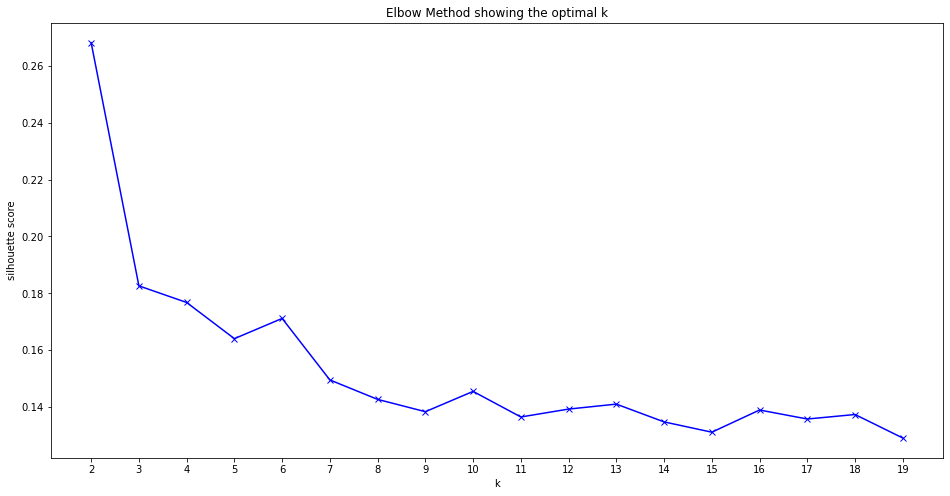

In [24]:
# plot
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [25]:
# when using the last two columns on song duration:
#five was a good choice, 3 or 8 could be good too, stay with 5.
#after removing the 2 last columns from the original df regarding time: 5 is still a good option.




## store files in pickles

In [26]:
#store the df with the five clusters info column in a pickle

#only with clustering columns:
greatest_clustering_df.to_pickle("Data/clustering_df.pkl")

#original df with all the columns plus clustering
greatest_df.to_pickle("Data/greatest_clusterd_df.pkl")



#store scaler and kmeans in pickle files:

dump(scaler,"Data/scaler.joblib")

dump(Five_kmeans,"Data/kmeans.joblib") 


['Data/kmeans.joblib']